# Weapon Classification

**Target:** To build a model which classifies **12 types** of **weapons**, including `Bow_and_arrow`, `Cannon`, `Dagger`, `Knife`, `Rifle`, `Shotgun`, `Tank`, `Axe`, `Handgun`, `Sword`, `Missile` and `Bomb` using Artificial Neural Networks.


**About the model:** We use a model here known as `resnet34`, trained using about `1.3` million images.

**Dataset:** We use Google's `Open Images Dataset v4` open source as a dataset. The dataset consists of `600` classes which contains `1.7` million pictures.

## Library installation
We need:

`fastai==2.5.3` version or above (2.7.12)

`torch==1.10.0+cu111` version or above (2.0.1+cu118)



---

**❗Make sure you turned on GPU**

In [ ]:
# import torch
# torch.cuda.is_available()

True

In [ ]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

2.7.12
2.0.1+cu118


## Dataset

We use `Google`'s [Open Images Dataset v4](https://storage.googleapis.com/openimages/web/index.html) open source as a dataset. The dataset consists of [600](https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html) classes which contains `1.7 million` pictures.

In order to download this, we use `OIDv4_ToolKit`. (https://github.com/EscVM/OIDv4_ToolKit)

![picture](https://raw.githubusercontent.com/EscVM/OIDv4_ToolKit/master/images/classes.png)

## Downloading `OIDv4_ToolKit`

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 32.65 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
# get help
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated (h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default) or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

options:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    dataset
    f

We are going to build a model which classifies **12 types** of **weapons**, including `Bow_and_arrow`, `Cannon`, `Dagger`, `Knife`, `Rifle`, `Shotgun`, `Tank`, `Axe`, `Handgun`, `Sword`, `Missile` and `Bomb`. For each class we get `200` pictures by `OIDv4_ToolKit`

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Bow_and_arrow Cannon Dagger Knife Rifle Shotgun Tank Axe Handgun Sword Missile Bomb --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bow and arrow.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 66441 KB/s, 0 seconds passed
[DOWNLOAD] |

## Model building

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path("train")
path.ls()  #check the directory

(#12) [Path('train/Knife'),Path('train/Dagger'),Path('train/Rifle'),Path('train/Tank'),Path('train/Bow and arrow'),Path('train/Bomb'),Path('train/Axe'),Path('train/Shotgun'),Path('train/Missile'),Path('train/Cannon')...]

In [ ]:
fls = get_image_files(path) #check how many pictures there are
fls

(#2121) [Path('train/Knife/be761ed80b91a22a.jpg'),Path('train/Knife/79233c444009079f.jpg'),Path('train/Knife/84fe1ec39ac17a19.jpg'),Path('train/Knife/54f7e19aad75a24a.jpg'),Path('train/Knife/05464a22589cd60d.jpg'),Path('train/Knife/a8d7ee02ce2b8dc3.jpg'),Path('train/Knife/1909fcdcdc54d91e.jpg'),Path('train/Knife/131a31401b071bda.jpg'),Path('train/Knife/35f984599ce49b97.jpg'),Path('train/Knife/91bf8ff0e12259b8.jpg')...]

In [ ]:
failed = verify_images(path) #check if there is any corrupted pictures
failed

'PosixPath' object is not iterable


(#0) []

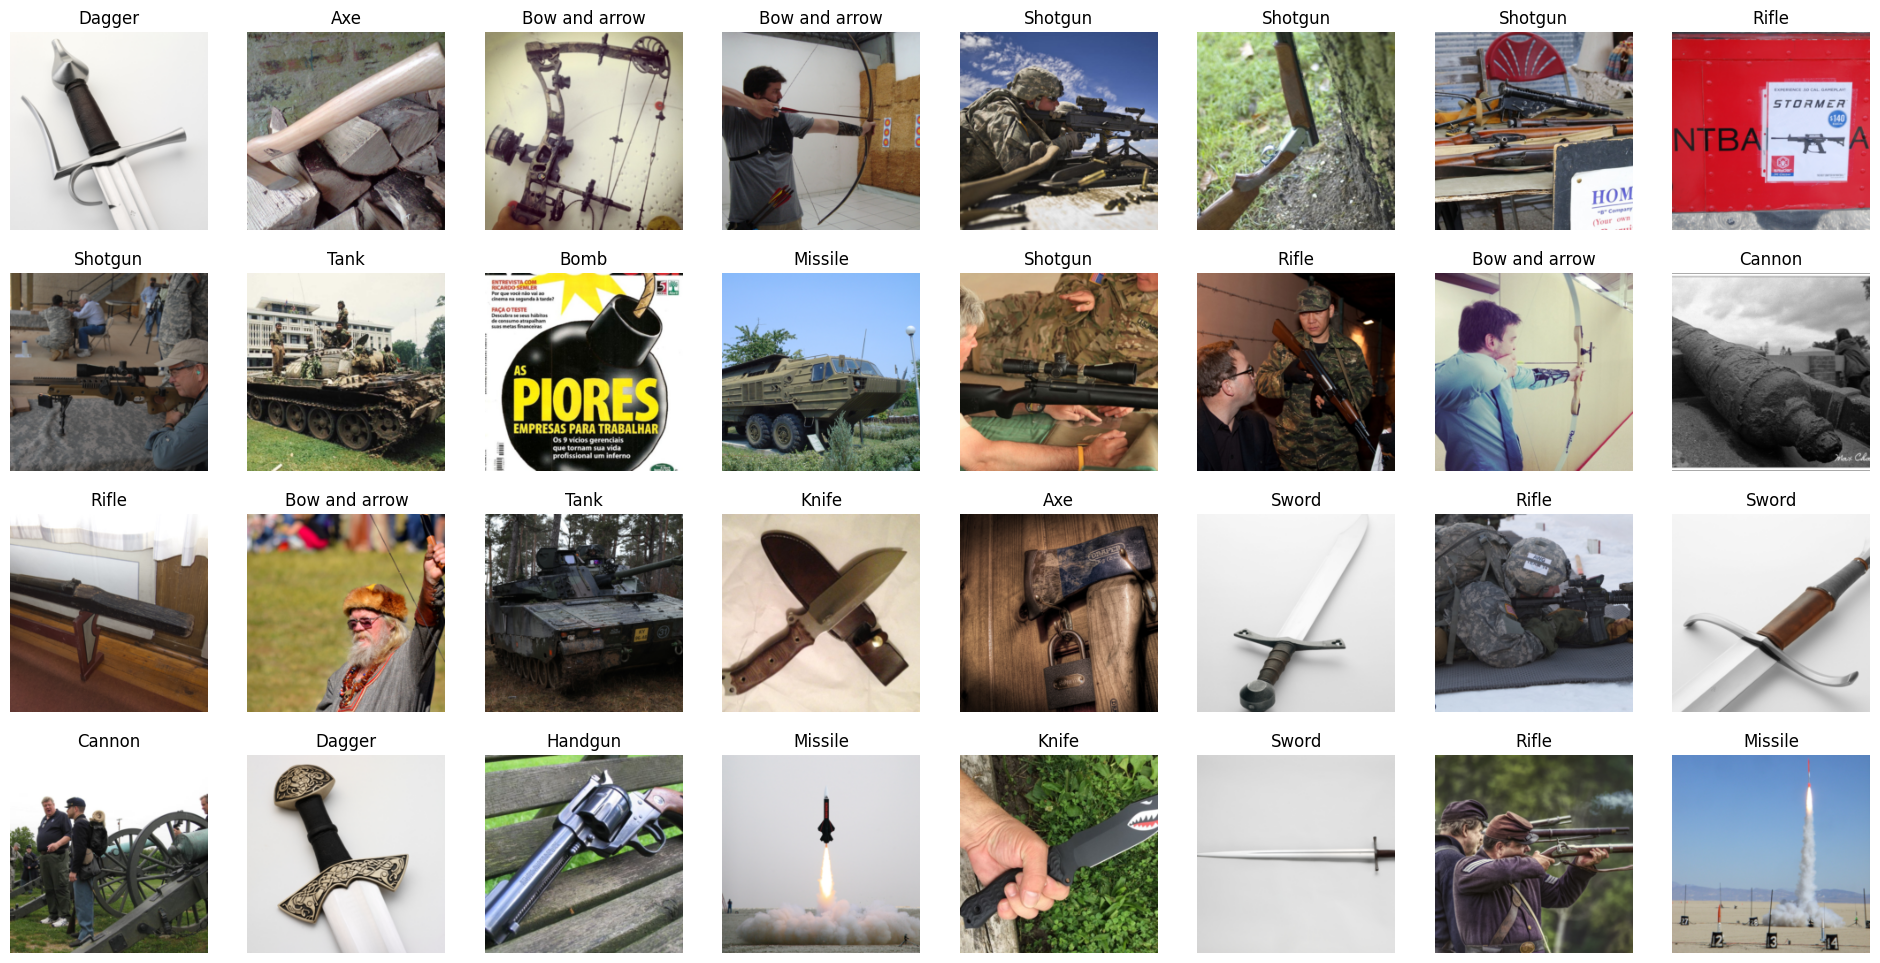

In [ ]:
# Making Datablock
weapons = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)

)

# Create dataloader
dls = weapons.dataloaders(path)

# Dataset checking
dls.train.show_batch(max_n=32, nrows=4)

In [ ]:
# train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.318516,0.991579,0.662736,00:28


epoch,train_loss,valid_loss,accuracy,time
0,1.063675,0.915583,0.688679,00:29
1,0.866685,0.927990,0.686321,00:30
2,0.721211,1.005410,0.672170,00:29
3,0.608830,1.101949,0.674528,00:30
4,0.516278,1.136472,0.695755,00:30
5,0.423806,1.176246,0.674528,00:29
6,0.354841,1.174261,0.688679,00:29
7,0.296055,1.176781,0.700472,00:29
8,0.253463,1.195690,0.693396,00:30
9,0.221497,1.195179,0.705189,00:29


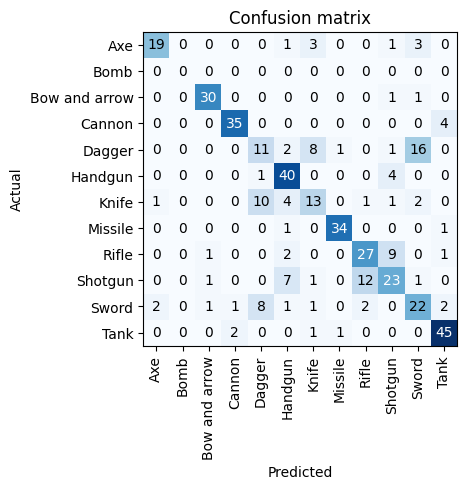

In [ ]:
# checking
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

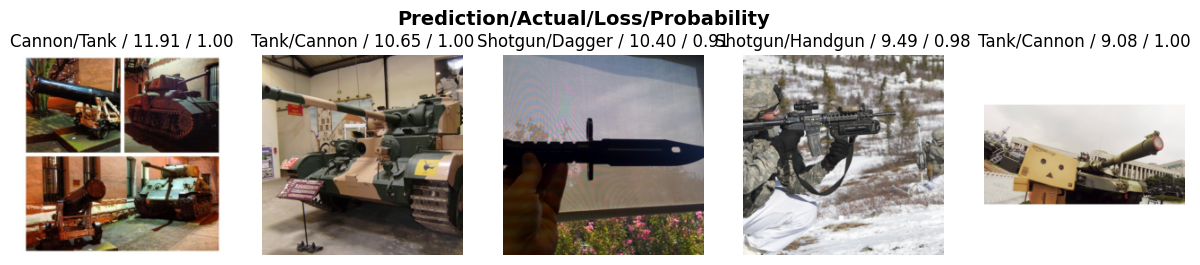

In [ ]:
interp.plot_top_losses(5, nrows=1) #showing top losses

## Model checking

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Shotgun
Probability: 88.7 %


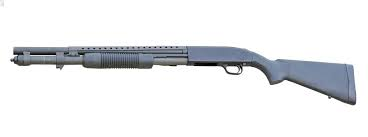

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f} %")
img

## Save the trained model

In [ ]:
learn.export("weapons_model.pkl")

## Download the model

In [ ]:
model = load_learner("/content/weapons_model.pkl")

In [ ]:
model.predict(img)

('Shotgun',
 tensor(9),
 tensor([4.3228e-04, 1.4366e-04, 4.5815e-05, 4.6789e-04, 8.0576e-04, 9.5332e-03,
         4.5584e-04, 5.1711e-05, 9.9944e-02, 8.8705e-01, 8.7505e-04, 1.9101e-04]))

# Deployment

**Streamlit:** https://weaponclassification.streamlit.app/

## Further Work:


**Fine-tuning the Model**: To improve the model's performance, consider fine-tuning the pre-trained `resnet34` on a dataset specifically related to weapon classification. Fine-tuning can help the model adapt better to the nuances of weapon images.

**Data Augmentation:** Explore more advanced data augmentation techniques to increase the diversity of your training dataset. This could involve applying transformations like rotation, scaling, and cropping to the images, which may lead to better generalization.

**Hyperparameter Tuning**: Experiment with different learning rates, batch sizes, and optimizers to find the best combination for your specific problem. Hyperparameter tuning can significantly impact model performance.

**Model Ensembling:** Combine predictions from multiple models or checkpoints to improve the overall accuracy. Ensembling techniques, such as bagging or boosting, can be effective in enhancing model robustness.

**Class Imbalance Handling:** Address any class imbalance issues if present in your dataset. Techniques like oversampling, undersampling, or using class weights can help the model perform better on minority classes.

**Explainability:** Implement methods for interpreting model decisions, especially in critical applications like weapon classification. Techniques like Grad-CAM or LIME can provide insights into what features the model uses to make predictions.

**Real-world Deployment:** Consider deploying the model in real-world scenarios, such as security systems or surveillance applications. Ensure that the model's performance remains consistent in different lighting and environmental conditions.

## Conclusion:


In this project, we successfully developed a weapon classification model using the `resnet34` architecture trained on the extensive `Google Open Images Dataset v4`. The model achieved a respectable accuracy of approximately **70%** on the validation set. However, there is room for improvement.

**In conclusion**, this project lays the foundation for further enhancements. Fine-tuning, advanced data augmentation, hyperparameter tuning, and model ensembling are avenues for boosting performance. Additionally, addressing class imbalances and ensuring model explainability are crucial for practical deployment.

The weapon classification model shows promise for various applications, from security systems to law enforcement. With continued work and optimization, it has the potential to contribute significantly to the safety and security of our communities.